In [1]:
import numpy as np
import pandas as pd
import re
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer

In [2]:
# metrics to check : 
# 1)taux d'erreur
# 2)Precision **** to maximise
# 3)Rappel **** also to maximise ensemble
# 4)ROC : well we create one to maximise precision then one model to maximise rappelnd see which one perfoms better on both metrics(ROC)
# 5)moyenne harmonique de P et R (F-meùsure): 


In [3]:
df = (pd.read_fwf('./train.txt', colspecs=[(1,4),(6,-1)], header=None).set_axis(['country','description'], axis=1))


In [4]:
df.head()

,country,description
0,GER,IThe importance and popularity of travelling i...
1,TUR,"It is an important decision , how to plan your..."
2,CHI,Some people believe that young people can enjo...
3,TEL,Travelling is usually considered as good recre...
4,ARA,i agree that . Life is a person live period of...


In [5]:
le = preprocessing.LabelEncoder()
df['y_country'] = le.fit_transform(df.country)

In [6]:
df

,country,description,y_country
0,GER,IThe importance and popularity of travelling i...,3
1,TUR,"It is an important decision , how to plan your...",10
2,CHI,Some people believe that young people can enjo...,1
3,TEL,Travelling is usually considered as good recre...,9
4,ARA,i agree that . Life is a person live period of...,0
...,...,...,...
9895,CHI,"Nowadays , more and more people go abroad , no...",1
9896,KOR,In accomplishing something that is risky comes...,7
9897,SPA,"At the beginning of the 21st century , the inc...",8
9898,HIN,The number of cars in use across the world has...,4


In [7]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

def clean_review(text):
    """
    Clean the input text 
    """
    cleaned_text = text.lower()
    #cleaned_text =  re.sub(r'^https?:\/\/.*[\r\n]*', '', cleaned_text)
    cleaned_text = re.sub('<.*>', '', cleaned_text)
    cleaned_text = re.sub('[^a-zA-Z0-9\s]', '', cleaned_text)
    cleaned_text = cleaned_text.split()
    #cleaned_text = [word for word in cleaned_text if word not in stopwords and len(word) > 1]
    
    return " ".join(cleaned_text)

In [8]:
df

,country,description,y_country
0,GER,IThe importance and popularity of travelling i...,3
1,TUR,"It is an important decision , how to plan your...",10
2,CHI,Some people believe that young people can enjo...,1
3,TEL,Travelling is usually considered as good recre...,9
4,ARA,i agree that . Life is a person live period of...,0
...,...,...,...
9895,CHI,"Nowadays , more and more people go abroad , no...",1
9896,KOR,In accomplishing something that is risky comes...,7
9897,SPA,"At the beginning of the 21st century , the inc...",8
9898,HIN,The number of cars in use across the world has...,4


In [9]:
df['cleaned_description'] = df['description'].apply(lambda x: clean_review(x))

In [10]:
df.head()

,country,description,y_country,cleaned_description
0,GER,IThe importance and popularity of travelling i...,3,ithe importance and popularity of travelling i...
1,TUR,"It is an important decision , how to plan your...",10,it is an important decision how to plan your s...
2,CHI,Some people believe that young people can enjo...,1,some people believe that young people can enjo...
3,TEL,Travelling is usually considered as good recre...,9,travelling is usually considered as good recre...
4,ARA,i agree that . Life is a person live period of...,0,i agree that life is a person live period of t...


In [11]:
X = df['cleaned_description'].values.tolist() 
Y = df['y_country'].values.tolist()

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, 
                                                    Y,stratify=Y,
                                                    test_size=0.1111, random_state=42, shuffle=True)

In [13]:
#would be better if u split data before then fit then transform  
tf = TfidfVectorizer(stop_words='english')
tf_Xtrain = tf.fit_transform(X_train)

In [14]:
tf_Xtest = tf.transform(X_test)

In [15]:
X_test_vect =  pd.DataFrame(tf_Xtest.toarray())
X_train_vect = pd.DataFrame(tf_Xtrain.toarray())
X_test_vect.columns = tf.get_feature_names()
X_train_vect.columns = tf.get_feature_names()

/Users/laiduy98/miniconda3/envs/ds/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
X_train_vect.head()

,000,0000,020,030,0500pm,0700,0s,10,100,1000,...,zooming,zorld,zou,zoug,zould,zoung,zour,zourself,zouth,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#from sklearn.svm import SVC
from sklearn.svm import LinearSVC

#from sklearn.ensemble import RandomForestClassifier


In [18]:
clf = LinearSVC( max_iter = 2000, verbose= 2)
#clf = RandomForestClassifier(n_estimators=1000,verbose = 2,n_jobs = -1 )

In [19]:
clf.fit(X_train_vect,y_train)

[LibLinear]...*
optimization finished, #iter = 38
Objective value = -951.176449
nSV = 4227
...*.
optimization finished, #iter = 40
Objective value = -963.475255
nSV = 3927
...*
optimization finished, #iter = 38
Objective value = -892.086326
nSV = 4043
...*
optimization finished, #iter = 36
Objective value = -777.498488
nSV = 3562
...*
optimization finished, #iter = 36
Objective value = -915.089399
nSV = 3597
...*
optimization finished, #iter = 34
Objective value = -764.451234
nSV = 3514
....*
optimization finished, #iter = 42
Objective value = -914.690734
nSV = 3791
...*
optimization finished, #iter = 39
Objective value = -1000.013327
nSV = 3887
...*
optimization finished, #iter = 39
Objective value = -985.295656
nSV = 4134
...*
optimization finished, #iter = 37
Objective value = -804.625893
nSV = 3296
...*
optimization finished, #iter = 37
Objective value = -934.596463
nSV = 4141


LinearSVC(max_iter=2000, verbose=2)

In [20]:
y_pred = clf.predict(X_test_vect)

In [21]:
labels = le.classes_.tolist()

In [22]:
y_test = le.inverse_transform(y_test)
y_pred = le.inverse_transform(y_pred)

In [23]:
labels = ['JPN', 'KOR', 'CHI']
# ,  'HIN',  'TEL', 'ARA',  'TUR', 'SPA',  'FRE', 'ITA' ,'GER'

In [24]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred, labels = labels)

In [25]:
cf_df = pd.DataFrame(cf ,index = labels, columns = labels)

<AxesSubplot:>

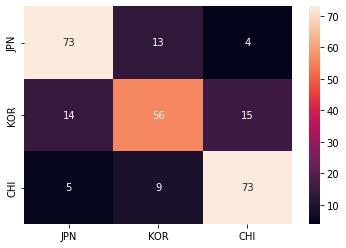

In [26]:
import seaborn as sns
sns.heatmap(cf_df, annot=True)

In [27]:
# we gotta change i'm to i am and can't to cannot and maybe we find can not we try to cahnge to cannot too 
#so we create a compteur that counts how many time we changed it from "smth"(not literally since we leave aka 
# #smth in it's place f blaset'ha xd)  to cannot mais plutot on compte combien de cannot appeared that's r not 
# #actually cannot 

# we gotta change i'm to i am and can't to cannot and maybe we find can not we try to cahnge to cannot too 
#so we create a compteur that counts how many time we changed it from "smth"(not literally since we leave aka #smth in it's place f blaset'ha xd)  to cannot mais plutot on compte combien de cannot appeared that's r not #actually cannot 

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))


0.7054545454545454


## Classifier Cascades

In [39]:
pd.DataFrame(y_test).value_counts()

0     100
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
dtype: int64